# Solar Energy Optimization

This project successfully analyzed and predicted solar energy generation based on various meteorological and atmospheric conditions. The overall goal is to utilize machine learning techniques to understand the relationship between weather conditions and solar power generation, improve forecasting accuracy, and optimize energy efficiency.

#### **Data**

The dataset used in this project is sourced from usaWithWeather.csv, which contains weather and solar energy data for different locations across the United States.

The data includes:

- DNI (Direct Normal Irradiance)
- GHI (Global Horizontal Irradiance)
- Surface Albedo
- Pressure
- Wind Speed
- Precipitable Water (Humidity)
- Ozone
- Latitude and Longitude (for geospatial analysis)
- Solar Power (in MW)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import folium
from folium.plugins import HeatMap
from prophet import Prophet
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('usaWithWeather.csv')

df.head()

,LocalTime,Power(MW),Year,Month,Day,Hour,Minute,DNI,DHI,GHI,...,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,Ozone,SSA,lat,long,elevation
0,2006-01-01 00:00:00,0.0,2006,1,1,0,0,0,0,0,...,0.15,1008,2.2,1.5,146,0.262,0.95,30.55,-86.65,59
1,2006-01-01 00:30:00,0.0,2006,1,1,0,30,0,0,0,...,0.15,1008,2.2,1.5,141,0.261,0.95,30.55,-86.65,59
2,2006-01-01 01:00:00,0.0,2006,1,1,1,0,0,0,0,...,0.15,1008,2.3,1.5,136,0.261,0.95,30.55,-86.65,59
3,2006-01-01 01:30:00,0.0,2006,1,1,1,30,0,0,0,...,0.15,1008,2.3,1.6,132,0.260,0.95,30.55,-86.65,59
4,2006-01-01 02:00:00,0.0,2006,1,1,2,0,0,0,0,...,0.15,1008,2.3,1.6,128,0.260,0.95,30.55,-86.65,59


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LocalTime           70080 non-null  object 
 1   Power(MW)           70080 non-null  float64
 2   Year                70080 non-null  int64  
 3   Month               70080 non-null  int64  
 4   Day                 70080 non-null  int64  
 5   Hour                70080 non-null  int64  
 6   Minute              70080 non-null  int64  
 7   DNI                 70080 non-null  int64  
 8   DHI                 70080 non-null  int64  
 9   GHI                 70080 non-null  int64  
 10  Fill Flag           70080 non-null  int64  
 11  Relative Humidity   70080 non-null  float64
 12  Solar Zenith Angle  70080 non-null  float64
 13  Clearsky GHI        70080 non-null  int64  
 14  Cloud Fill Flag     70080 non-null  int64  
 15  Cloud Type          70080 non-null  int64  
 16  Clea

In [4]:
df.describe()

,Power(MW),Year,Month,Day,Hour,Minute,DNI,DHI,GHI,Fill Flag,...,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,Ozone,SSA,lat,long,elevation
count,70080.000000,70080.0,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,...,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000,70080.000000
mean,0.178026,2006.0,6.526027,15.720548,11.500000,15.000000,226.435474,65.748730,197.794050,0.425171,...,0.228192,945.452369,1.752136,2.469727,197.212814,0.305243,0.937148,38.525000,-95.975000,627.750000
std,0.249903,0.0,3.447876,8.796310,6.922236,15.000107,349.360936,101.604528,287.812401,1.608075,...,0.157602,45.663600,1.267694,1.830328,96.046440,0.034275,0.025231,5.832012,14.100344,400.193669
min,0.000000,2006.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090000,879.000000,0.100000,0.000000,0.000000,0.224000,0.840000,30.550000,-114.450000,59.000000
25%,0.000000,2006.0,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.150000,904.000000,0.800000,1.100000,133.000000,0.284000,0.920000,34.300000,-106.725000,347.750000
50%,0.000000,2006.0,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.180000,928.500000,1.400000,2.000000,201.000000,0.300000,0.940000,39.100000,-95.400000,718.500000
75%,0.362583,2006.0,10.000000,23.000000,17.250000,30.000000,456.250000,95.000000,348.000000,0.000000,...,0.240000,985.000000,2.400000,3.400000,276.000000,0.323000,0.960000,43.325000,-84.650000,998.500000
max,0.930688,2006.0,12.000000,31.000000,23.000000,30.000000,1066.000000,633.000000,1095.000000,7.000000,...,0.800000,1030.000000,6.400000,13.300000,360.000000,0.498000,0.990000,45.350000,-78.650000,1015.000000


### Key Findings

- Solar power output has a large proportion of zero values, suggesting periods of inactivity (e.g., nighttime).
- Strong correlation between DNI, DHI, and GHI with Power(MW) is expected.
- Seasonality and time-based trends (since data spans a full year, we can analyze seasonal patterns).
- Weather factors like wind speed, pressure, and ozone impact solar generation, which can be explored using regression or time series analysis.
- Anomalies exist, possibly indicating equipment issues, unusual weather events, or data errors

## 1. Explore the Data

In [5]:
# Convert LocalTime to datetime format
df['LocalTime'] = pd.to_datetime(df['LocalTime'])

# Set the datetime column as the index
df.set_index('LocalTime', inplace=True)

I want to predicting Solar Energy Generation based on Weather Conditions I will use Supervised Learning (Regression) to predict Power(MW) using weather-related features.

In [7]:
# Selecting features and target
features = ['DNI', 'DHI', 'GHI', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Ozone']
target = 'Power(MW)'

# Splitting data
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

R² Score: 0.9266
MAE: 0.0344
RMSE: 0.0675


### Interpretation

- **R² Score: 0.9266** : This indicates that 92.66% of the variance in the target variable (Power in MW) is explained by the features used in the model. A high R² suggests a strong fit between predictions and actual values.

- **MAE (Mean Absolute Error): 0.0344** : On average, the model's predictions deviate from actual values by 0.0344 MW. Lower MAE means better accuracy.

- **RMSE (Root Mean Squared Error): 0.0675** : RMSE penalizes larger errors more than MAE. A value of 0.0675 MW suggests a small but noticeable deviation in predictions. Lower RMSE means better performance.

## 2. Analyze Solar Energy Generation Variations Over Time

The line plots for hourly patterns and box plots for monthly trends shows how solar power generation fluctuates throughout the day and across seasons.

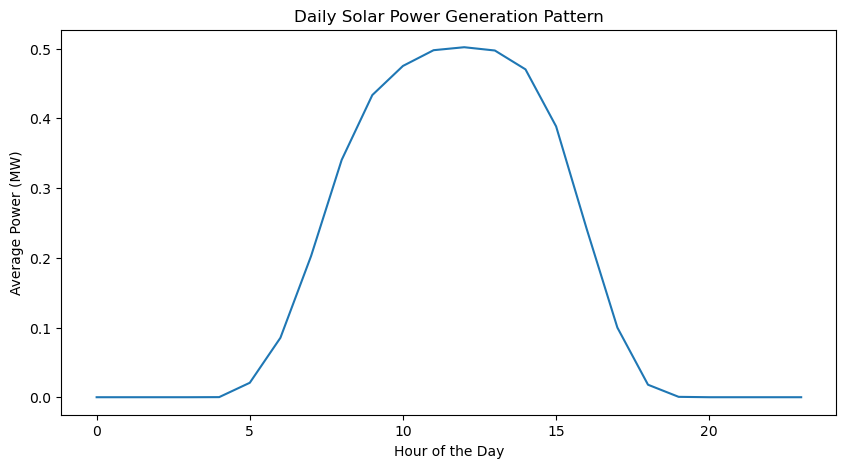

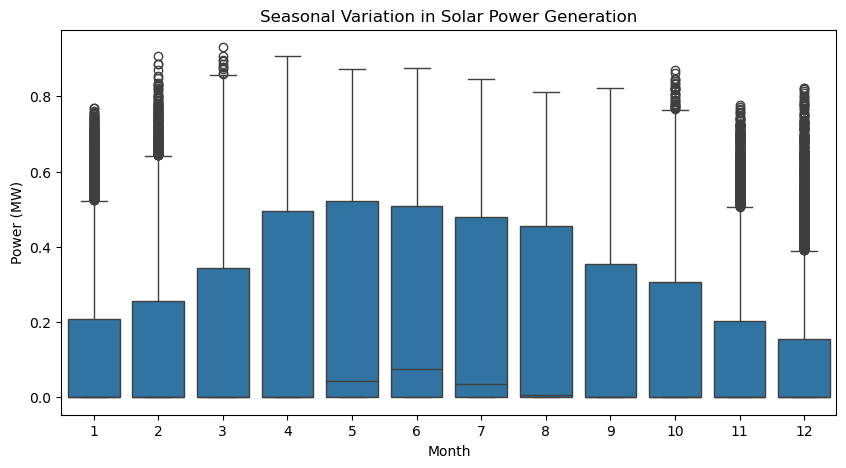

In [8]:
# Group by hour to see energy generation trends
df['Hour'] = df.index.hour
df['Month'] = df.index.month

# Average power generation per hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.groupby('Hour')['Power(MW)'].mean().index, y=df.groupby('Hour')['Power(MW)'].mean().values)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Power (MW)")
plt.title("Daily Solar Power Generation Pattern")
plt.show()

# Monthly trends
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=df['Power(MW)'])
plt.xlabel("Month")
plt.ylabel("Power (MW)")
plt.title("Seasonal Variation in Solar Power Generation")
plt.show()

## 3. Optimizing Solar Panel Placement with Location-Specific Factors

I visualize solar generation efficiency across different latitudes and longitudes. This helps identify regions with higher solar energy potential for optimal solar panel placement.

In [10]:
# Prepare data for mapping
location_data = df[['lat', 'long', 'Power(MW)']].dropna()

# Create a map
solar_map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=6)

# Add heatmap
HeatMap(location_data.values, radius=10).add_to(solar_map)

# Display map
solar_map

## 4. Impact of Atmospheric & Meteorological Factors on Solar Energy

I will analyze weather conditions and power output correlations.

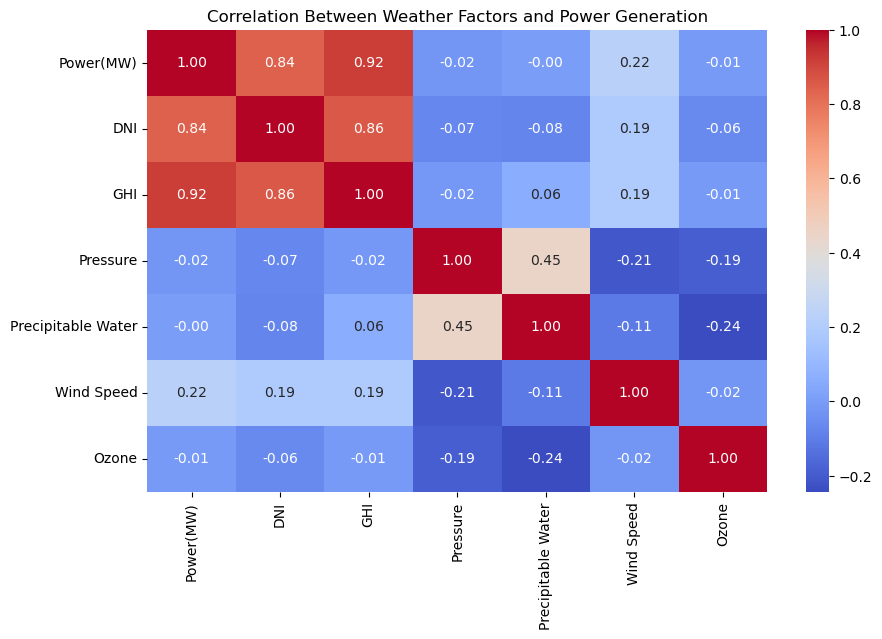

In [11]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Power(MW)', 'DNI', 'GHI', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Ozone']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Weather Factors and Power Generation")
plt.show()

### Key Insights

- DNI and GHI are the strongest predictors of power output (solar energy production depends on sunlight).
- Wind speed has a minor impact, suggesting hybrid power generation might be present.
- Pressure, humidity, and ozone have negligible effects on power generation.

## 5. Forecasting Future Solar Energy Production

I will use Prophet for time series forecasting.

15:40:00 - cmdstanpy - INFO - Chain [1] start processing
15:40:15 - cmdstanpy - INFO - Chain [1] done processing


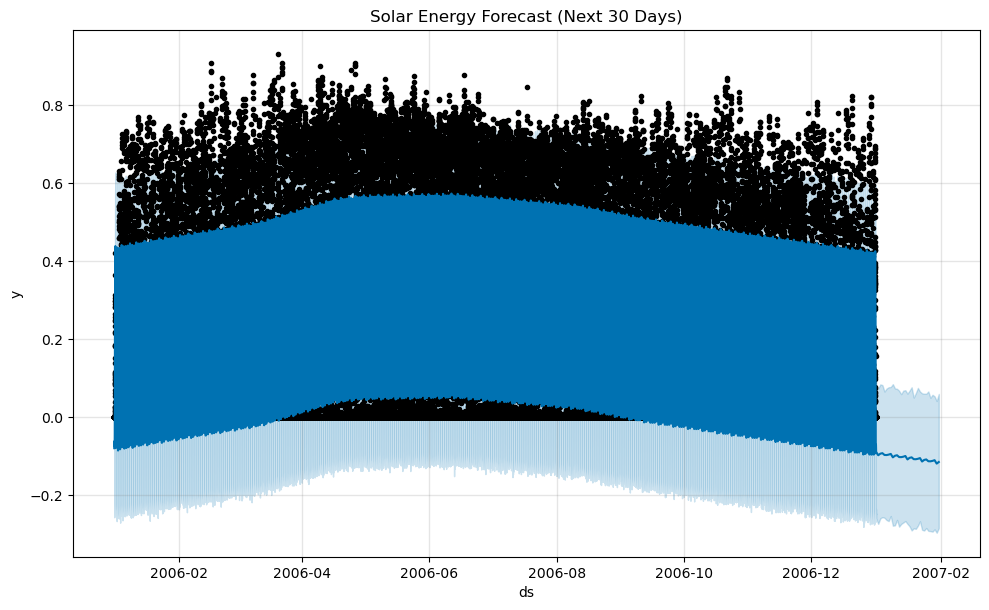

In [12]:
# Prepare data for Prophet
df_prophet = df[['Power(MW)']].reset_index()
df_prophet.columns = ['ds', 'y']

# Train Prophet Model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Predict next 30 days
future = model_prophet.make_future_dataframe(periods=30, freq='D')
forecast = model_prophet.predict(future)

# Plot forecast
model_prophet.plot(forecast)
plt.title("Solar Energy Forecast (Next 30 Days)")
plt.show()

## 6. Detecting Impact of Extreme Weather Conditions

I use anomaly detection to find days with unexpected drops in solar power. An Isolation Forest model is used to detect anomalies in solar power generation, particularly under extreme weather conditions (e.g., low DNI, high wind speed). The detected anomalies are visualized, helping to identify days when solar power production deviates from the norm, possibly due to extreme weather.

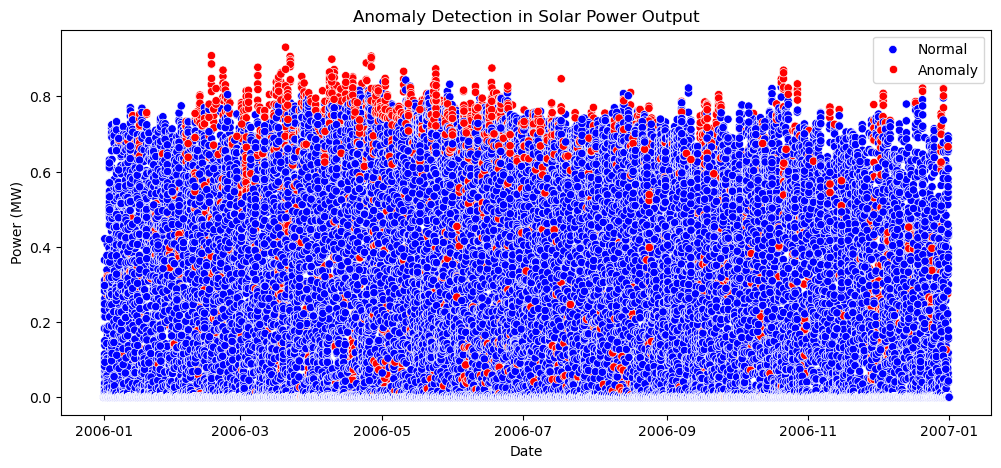

In [13]:
# Train anomaly detection model
anomaly_model = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = anomaly_model.fit_predict(df[['Power(MW)', 'DNI', 'GHI', 'Wind Speed']])

# Visualizing anomalies
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df.index, y=df['Power(MW)'], hue=df['Anomaly'], palette={1: 'blue', -1: 'red'})
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.title("Anomaly Detection in Solar Power Output")
plt.legend(["Normal", "Anomaly"])
plt.show()

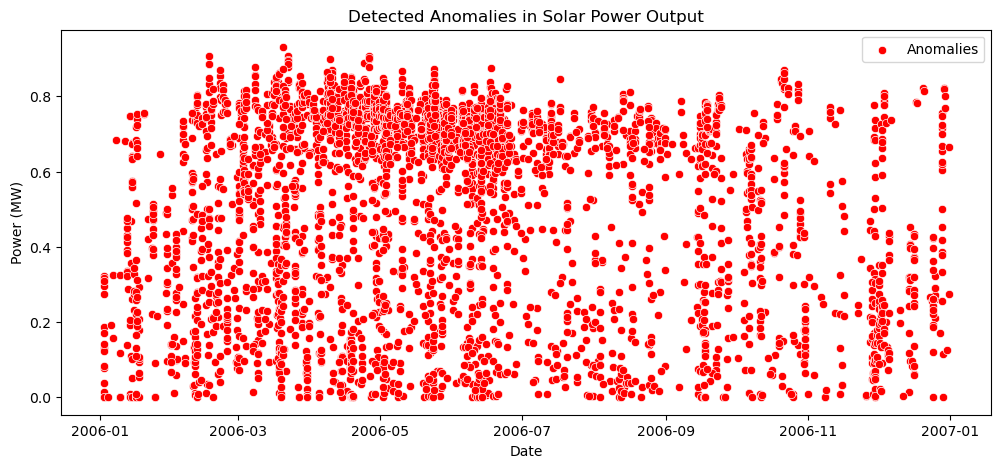

In [14]:
# Filter only anomalies
anomalies = df[df['Anomaly'] == -1]

# Plot anomalies
plt.figure(figsize=(12, 5))
sns.scatterplot(x=anomalies.index, y=anomalies['Power(MW)'], color='red', label='Anomalies')
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.title("Detected Anomalies in Solar Power Output")
plt.legend()
plt.show()

## Conclusion

The results indicate that Direct Normal Irradiance (DNI) and Global Horizontal Irradiance (GHI) are the strongest predictors of solar power output, highlighting the fundamental role of solar radiation in energy production. The high R² score of 0.9266 suggests that the model effectively captures the relationship between weather conditions and power generation.

#### Key takeaways from the analysis include:
- Solar energy production varies significantly across time and seasons, aligning with fluctuations in solar irradiance.
- Wind speed, pressure, and humidity have minimal impact on power output, suggesting that solar power is primarily influenced by sunlight availability rather than other atmospheric conditions.
- Extreme weather conditions (e.g., low DNI, high cloud cover) negatively affect solar energy generation, reinforcing the need for backup energy sources or hybrid systems.
- Location-specific optimization of solar panel placement is possible by leveraging detailed meteorological data to maximize energy yield.
- Forecasting future solar power production is feasible using machine learning models, enabling better energy planning and grid management.